# Week 10

In [1]:
import pandas as pd

df = pd.read_csv("marathon_results.csv")
df.head(5)

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division
0,25,M,ETH,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:02:39,02:09:17,00:04:56,1,1,1
1,30,M,ETH,00:14:43,00:29:43,00:44:58,01:00:28,01:04:01,01:16:07,01:31:59,01:47:59,02:02:42,02:09:48,00:04:58,2,2,2
2,29,M,KEN,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:03:01,02:10:22,00:04:59,3,3,3
3,28,M,KEN,00:14:43,00:29:44,00:45:01,01:00:29,01:04:02,01:16:07,01:32:00,01:48:03,02:03:47,02:10:47,00:05:00,4,4,4
4,32,M,KEN,00:14:43,00:29:44,00:44:58,01:00:28,01:04:01,01:16:07,01:32:00,01:47:59,02:03:27,02:10:49,00:05:00,5,5,5


In [5]:
df["tot_minutes"] = pd.to_timedelta(df["Finish"]).dt.total_seconds()/60
df.head(5)

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,tot_minutes
0,25,M,ETH,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:02:39,02:09:17,00:04:56,1,1,1,129.283333
1,30,M,ETH,00:14:43,00:29:43,00:44:58,01:00:28,01:04:01,01:16:07,01:31:59,01:47:59,02:02:42,02:09:48,00:04:58,2,2,2,129.800000
2,29,M,KEN,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:03:01,02:10:22,00:04:59,3,3,3,130.366667
3,28,M,KEN,00:14:43,00:29:44,00:45:01,01:00:29,01:04:02,01:16:07,01:32:00,01:48:03,02:03:47,02:10:47,00:05:00,4,4,4,130.783333
4,32,M,KEN,00:14:43,00:29:44,00:44:58,01:00:28,01:04:01,01:16:07,01:32:00,01:47:59,02:03:27,02:10:49,00:05:00,5,5,5,130.816667


Histogram of finish times:

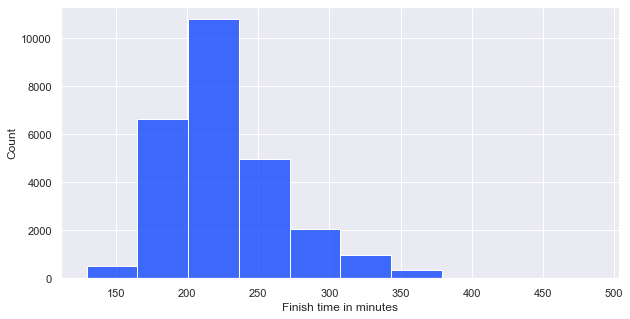

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid", palette="bright")
sns.histplot(df["tot_minutes"], bins=10)
plt.xlabel("Finish time in minutes");

In [10]:
import numpy as np
np.histogram(df["tot_minutes"], bins=10)

(array([  499,  6647, 10789,  4978,  2068,   969,   332,     8,     3,
            5]),
 array([129.28333333, 164.95666667, 200.63      , 236.30333333,
        271.97666667, 307.65      , 343.32333333, 378.99666667,
        414.67      , 450.34333333, 486.01666667]))

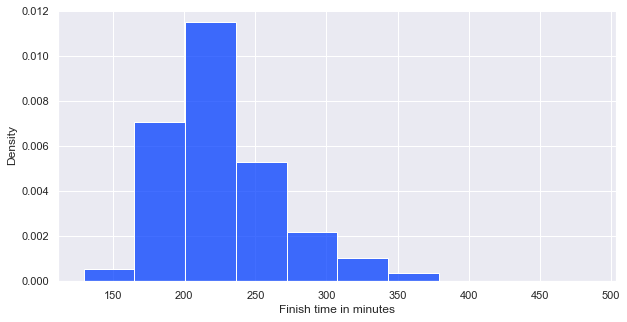

In [12]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid", palette="bright")
sns.histplot(df["tot_minutes"], bins=10, stat="density")
plt.xlabel("Finish time in minutes");

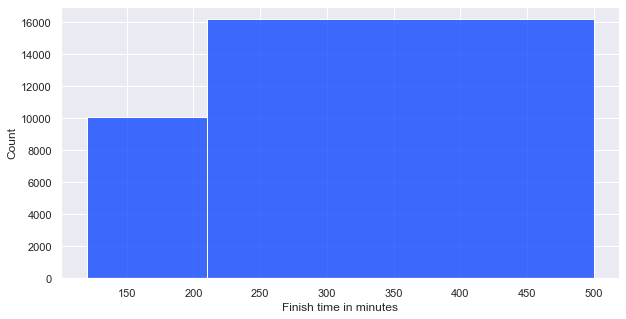

In [13]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid", palette="bright")
sns.histplot(df["tot_minutes"], bins=[120, 210, 500])
plt.xlabel("Finish time in minutes");

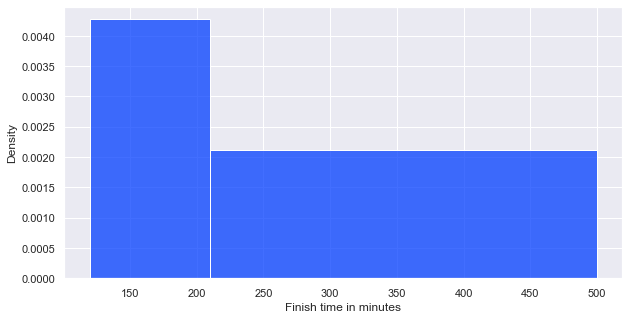

In [14]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="darkgrid", palette="bright")
sns.histplot(df["tot_minutes"], bins=[120, 210, 500], stat="density")
plt.xlabel("Finish time in minutes");

## Dependence of a histogram on bin width and bin endpoints selection

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

%config InlineBackend.figure_format = 'retina'
sns.set_theme(style="darkgrid", palette="bright")

def hist(data, bins=10, shift=0):
    '''
    Plots a histogram of data.

    bins:
        number of bins
    shift:
        shift of bin boundaries.
    '''

    plt.figure(figsize=(12,4))
    max_shift = 5
    data = np.array(data)
    plt.xlim(data.min() - max_shift, data.max() + max_shift)
    sns.histplot(data,
                 stat="density",
                 bins=bins,
                 binrange =  (data.min() - max_shift + shift,
                               data.max() + max_shift + shift)
                )
    sns.rugplot(data, height=0.05, color='w')
    plt.show()


N = 50
rng = np.random.default_rng(10)
data = rng.normal(loc=10, scale=5, size=N)
interact(hist, shift=(0, 5, 0.25), bins=(1, 30, 1), data=fixed(data));

interactive(children=(IntSlider(value=10, description='bins', max=30, min=1), FloatSlider(value=0.0, descripti…

## Probability density function

$$P(a< x < b) = \int_a^b f(x)dx$$

## KDE with Gaussian kernels

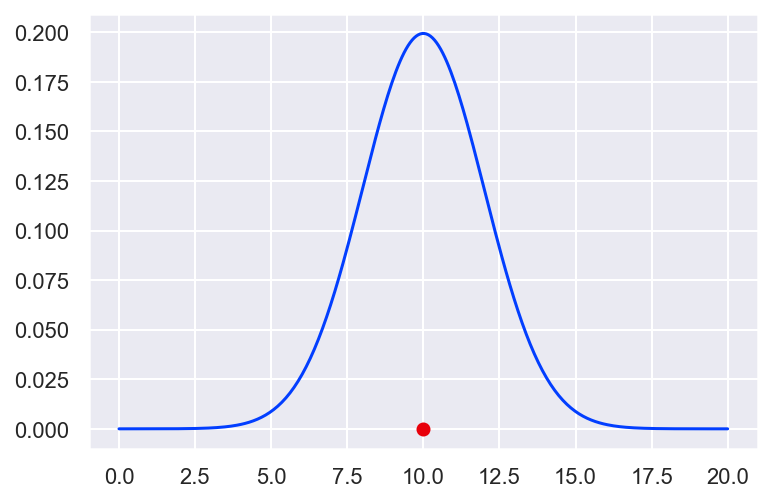

In [20]:
from scipy.stats import norm

X = 10
h = 2
x = np.linspace(0, 20, 300)
plt.plot(x, norm.pdf(x, loc=X, scale=h))
plt.plot(X, 0, 'ro');

In [45]:
from scipy.stats import norm

def kde(data, h, x):
    """
    Compute KDE of data with  Gaussian kernels

    x:
       KDE value will be computed for each value
       of this array.
    h:
       Kernel bandwidth
    """

    y = np.zeros_like(x)
    for X in data:
        y += norm.pdf(x, loc=X, scale=h)
    return y/len(data)


def plot_kde(data, h=0.1, show_kernels=False):
    """
    Plot KDE

    data:
        An array with data defining KDE.
    h:
        Kernel bandwidth.
    show_kernels:
        Boolean. If true, individual kernels are
        plotted too.
    """

    x = np.linspace(data.min() - 3, data.max() + 3, 400)
    plt.figure(figsize=(14,4))
    plt.plot(x, kde(data, h, x), lw=7, c='steelblue', alpha=0.4)
    plt.plot(data, [0]*len(data), 'r|', ms=15, mew=2)
    if show_kernels:
        for X in data:
            plt.plot(x, 1/len(data)*norm.pdf(x, loc=X, scale=h), 'r--', lw=0.7)

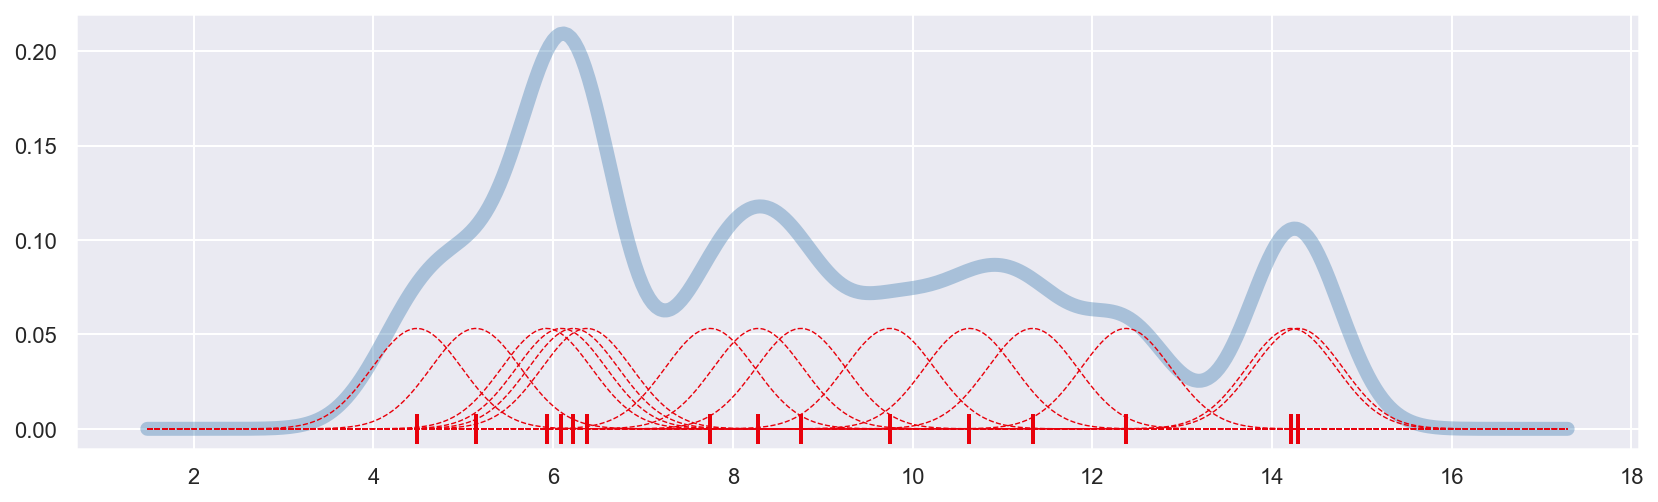

In [46]:
N = 15
rng = np.random.default_rng(10)
data = rng.normal(loc=10, scale=5, size=N)
plot_kde(data, h=0.5, show_kernels=True)

In [47]:
interact(plot_kde, data=fixed(data), h=(0.1, 4.0, 0.1), show_kernels=True)

interactive(children=(FloatSlider(value=0.1, description='h', max=4.0, min=0.1), Checkbox(value=True, descript…

<function __main__.plot_kde(data, h=0.1, show_kernels=False)>

## Gaussian KDE with SciPy 

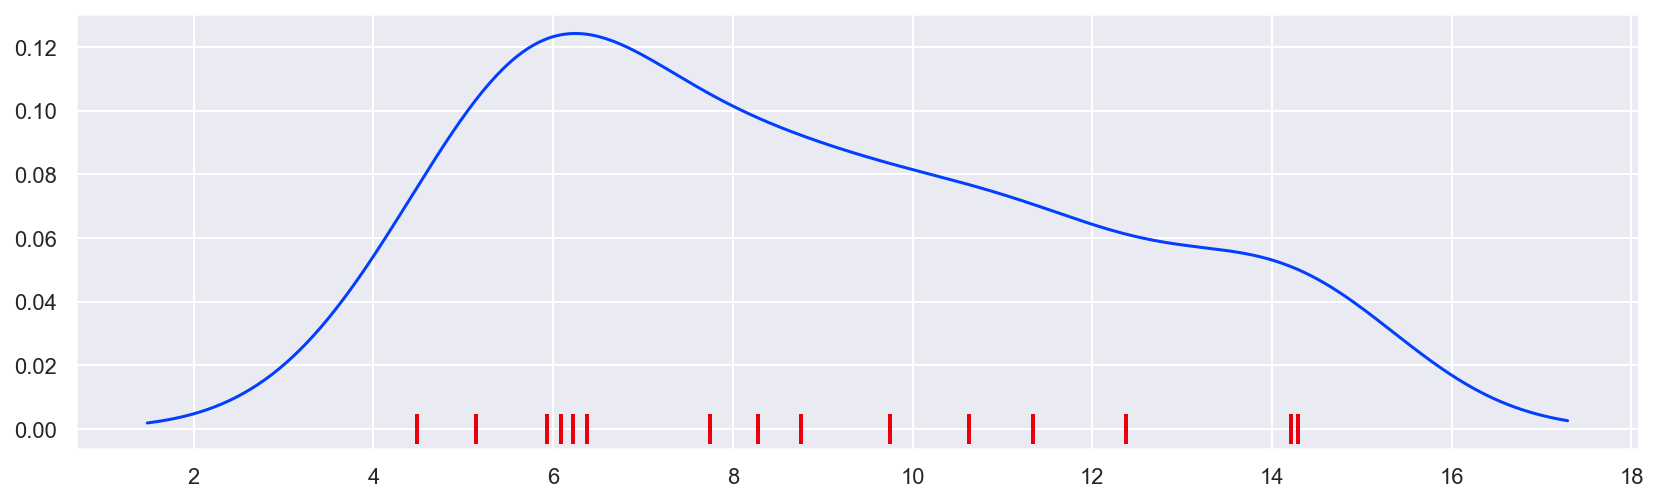

In [43]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(data, bw_method=0.4)

plt.figure(figsize=(14, 4))
plt.plot(data, [0]*len(data), 'r|', ms=15, mew=2)
x = np.linspace(data.min() - 3, data.max() + 3, 400)
plt.plot(x, kde(x));

In [42]:
kde(5)

array([0.09976728])

In [44]:
data.std()*0.4

1.241255036359153